In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# MNIST IMAGE --> Tensors

In [5]:
transform = transforms.ToTensor()

In [6]:
train_data = datasets.MNIST(root='./Data', train=True, download=True, transform=transform)

c:\Users\1000262917\Anaconda3\envs\pytorchenv\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
test_data = datasets.MNIST(root='./Data', train=False, download=True, transform=transform)

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [10]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [11]:
type(train_data[0])

tuple

In [12]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [13]:
image, label = train_data[0]

In [14]:
image.shape # 1 = 1 color channel

torch.Size([1, 28, 28])

In [15]:
label

5

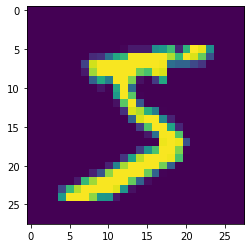

In [16]:
plt.imshow(image.reshape((28, 28))) # virdis

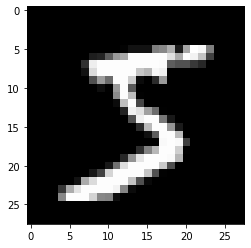

In [17]:
plt.imshow(image.reshape((28, 28)), cmap='gray')

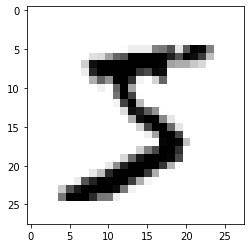

In [18]:
plt.imshow(image.reshape((28, 28)), cmap='gist_yarg')

In [19]:
torch.manual_seed(101)

# 0 images, 1 images, ...
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [20]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # FORMATTING

In [21]:
# FIRST BATCH

for images, labels in train_loader:
    # 60,000 / 100 60 times
    break

In [22]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [23]:
images.shape

torch.Size([100, 1, 28, 28])

Labels:  [   7    2    3    5    8    5    3    6    9    9    1    3]


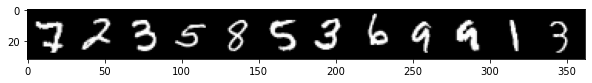

In [24]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12) # the default nrow is 8
plt.figure(figsize=(10,4))

# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

In [25]:
class MultilayerPerceptron(nn.Module):
    
    def __init__ (self, in_sz=784, out_sz=10, layers=[120,84]):
        
        super().__init__()
        
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)
    
    def forward(self, X):
        
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X, dim=1) # MULTI CLASS CLASSIFICATION

In [26]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [27]:
# ANN ---> CNN

for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [28]:
# 104,214 total parameters

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [30]:
images.shape # ---> [100,784]

torch.Size([100, 1, 28, 28])

In [31]:
images.view(100,-1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [32]:
images.view(100,-1).shape

torch.Size([100, 784])

In [33]:
import time

start_time = time.time()

# TRAINING

epochs = 10

# TRACKERR
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # 10 Neurons
        # [0.1,0.0,......,0.8] ---> predict label 9
        y_pred = model(X_train.view(100, -1))
        loss = criterion(y_pred, y_train)
        
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200 == 0:
            acc = trn_corr.item()*100/(100*b)
            print(f'Epoch {i} batch {b} loss: {loss.item()} accuracy: {acc}')
            
    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())
    
    with torch.no_grad():
        
        for b, (X_test, y_test) in enumerate(test_loader):
            
            y_val = model(X_test.view(500,-1))
            
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val,y_test)
    test_losses.append(loss.item())
    test_correct.append(tst_corr.item())


total_time = time.time() - start_time
print(f'Duration: {total_time/60} mins')

Epoch 0 batch 200 loss: 0.2356237918138504 accuracy: 83.245
Epoch 0 batch 400 loss: 0.3533070683479309 accuracy: 87.5325
Epoch 0 batch 600 loss: 0.13765770196914673 accuracy: 89.58166666666666
Epoch 1 batch 200 loss: 0.24507994949817657 accuracy: 94.88
Epoch 1 batch 400 loss: 0.1415732353925705 accuracy: 95.105
Epoch 1 batch 600 loss: 0.07288368791341782 accuracy: 95.36833333333334
Epoch 2 batch 200 loss: 0.08517581969499588 accuracy: 96.61
Epoch 2 batch 400 loss: 0.061325810849666595 accuracy: 96.6975
Epoch 2 batch 600 loss: 0.06279157847166061 accuracy: 96.75
Epoch 3 batch 200 loss: 0.11695742607116699 accuracy: 97.63
Epoch 3 batch 400 loss: 0.05154384300112724 accuracy: 97.4875
Epoch 3 batch 600 loss: 0.03660450130701065 accuracy: 97.51333333333334
Epoch 4 batch 200 loss: 0.10782867670059204 accuracy: 98.125
Epoch 4 batch 400 loss: 0.04611876979470253 accuracy: 98.0275
Epoch 4 batch 600 loss: 0.05378490313887596 accuracy: 98.01666666666667
Epoch 5 batch 200 loss: 0.00804360955953598

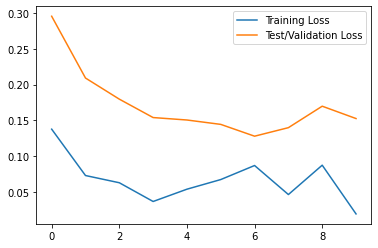

In [34]:
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test/Validation Loss')
plt.legend()

In [35]:
train_correct # sum of each batch

[53749, 57221, 58050, 58508, 58810, 59038, 59207, 59357, 59463, 59574]

In [36]:
train_acc = [t/600 for t in train_correct] # divide by batch size

In [37]:
train_acc

[89.58166666666666,
 95.36833333333334,
 96.75,
 97.51333333333334,
 98.01666666666667,
 98.39666666666666,
 98.67833333333333,
 98.92833333333333,
 99.105,
 99.29]

In [38]:
test_acc = [t/100 for t in test_correct]

In [39]:
test_acc

[94.37, 95.83, 96.92, 97.14, 97.47, 97.6, 97.84, 97.51, 97.54, 97.72]

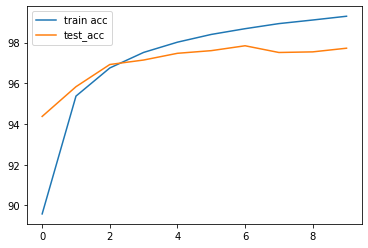

In [40]:
plt.plot(train_acc, label='train acc')
plt.plot(test_acc, label='test_acc')
plt.legend()

In [41]:
# New Unseen Data

test_load_all  = DataLoader(test_data, batch_size=10000, shuffle=False)

In [42]:
with torch.no_grad():
    correct = 0

    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum()

In [43]:
100*correct.item()/len(test_data)

97.72

In [44]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 971,    0,    4,    0,    1,    2,    5,    2,    5,    1],
       [   0, 1124,    3,    0,    0,    0,    3,    7,    0,    3],
       [   1,    3, 1003,    2,    1,    0,    1,    9,    4,    0],
       [   2,    3,    5,  991,    0,   12,    1,    1,    4,    3],
       [   1,    0,    2,    0,  965,    3,    2,    3,    5,    8],
       [   0,    0,    0,    4,    0,  861,    3,    1,    2,    3],
       [   1,    1,    1,    0,    5,    5,  942,    0,    1,    0],
       [   1,    0,    4,    4,    0,    0,    0,  981,    3,    0],
       [   2,    4,    9,    3,    0,    7,    1,    2,  946,    3],
       [   1,    0,    1,    6,   10,    2,    0,   22,    4,  988]],
      dtype=int64)